# transversity

In [1]:
import sys,os
os.chdir('../../')
import itertools as it
import numpy as np
import pandas as pd
from scipy.special import beta
from scipy.integrate import quad
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
import matplotlib
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from resman import RESMAN
import nest

## setup

In [7]:
path='outputs/transversity/transversity-0/'

In [8]:
conf=load_config('%s/transversity-0.py'%path)
resman=RESMAN(conf);
parman=resman.conf['parman']

loading sidis data sets 3013

In [9]:
NEST={}
for f in os.listdir(path):
    if 'nest' in f:
        fname='%s/%s'%(path,f)
        NEST[int(f.replace('nest',''))]=load(fname)

In [10]:
NEST[0].keys()

['active nll', 'samples', 'logz', 'l', 'weights', 'active p', 'x']

## analyze nested sampling statistics

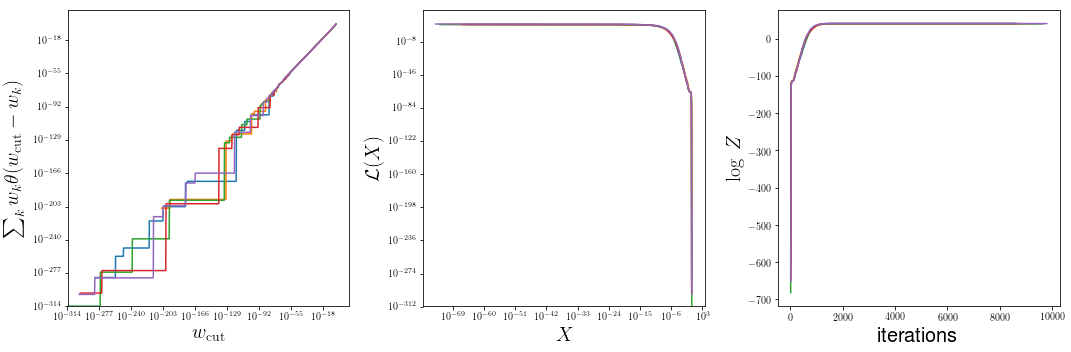

In [52]:
wmin_cut=0
nrows,ncols=1,3
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
for k in NEST:
    nest=NEST[k]
    weights=np.copy(nest['weights'])
    weights=[w for w in weights if w>wmin_cut]
    wmin=np.amin(weights)
    wmax=np.amax(weights)
    w=10**np.linspace(np.log10(wmin),np.log10(wmax),1000)
    wsum=lambda wcut: np.sum([w for w in weights if w<wcut])
    ax.plot(w,[wsum(wcut) for wcut in w])
ax.semilogx();
ax.semilogy();
ax.set_ylabel(r'$\sum_k w_k \theta(w_{\rm cut}-w_k)$',size=20)
ax.set_xlabel(r'$w_{\rm cut}$',size=20)

ax=py.subplot(nrows,ncols,2)
for k in NEST:
    nest=NEST[k]
    X=[nest['x'][i] for i in range(len(nest['x'])) if nest['weights'][i]>wmin_cut]
    L=[nest['l'][i] for i in range(len(nest['l'])) if nest['weights'][i]>wmin_cut]
    ax.plot(X,L)
    ax.semilogx()
    ax.semilogy()
    ax.set_ylabel(r'${\cal L}(X)$',size=20)
    ax.set_xlabel(r'$X$',size=20)

ax=py.subplot(nrows,ncols,3)
for k in NEST:
    nest=NEST[k]
    it=[i for i in range(len(nest['x'])) ]#if nest['weights'][i]>wmin_cut]
    LOGZ=[nest['logz'][i] for i in range(len(nest['l'])) ]#if nest['weights'][i]>wmin_cut]
    ax.plot(it,LOGZ)
    ax.set_ylabel(r'$\log \;Z$',size=20)
    ax.set_xlabel(r'iterations',size=20)

py.tight_layout()
#py.savefig('gallery/transversity/L-X.pdf')

## Select the best sample

In [85]:
Ntot=float(np.sum([len(NEST[k]['active p'])  for k in NEST]))
samples=np.copy(NEST[0]['samples'])
L=np.copy(NEST[0]['l'])
for k in NEST:
    samples=np.concatenate((samples,NEST[k]['samples']),axis=0)
    L=np.concatenate((L,NEST[k]['l']))
I=np.argsort(L)
L=L[I]
X=np.array([((Ntot-1)/Ntot)**i for i in range(L.size)])
weights=X*L
weights/=np.sum(weights)
samples=samples[I]

In [86]:
# initial=len(samples)
# wmax=np.amax(weights)
# wmin_cut=wmax*1e-10
# weights=[weights[j] for j in range(len(weights)) if weights[j]>wmin_cut]
# samples=[samples[j] for j in range(len(weights)) if weights[j]>wmin_cut]
# weights/=np.sum(weights)
# final=len(samples)
# print 'initial size=%d  final size=%d'%(initial,final)


## parameters

In [87]:
def plot_params(k,kk,idx):
    order=parman.order
    get_idx=lambda _kk: [i for i in range(len(order)) if order[i][1]==k if order[i][2]==_kk][0]
    nrows,ncols=1,5
    py.figure(figsize=(ncols*3,nrows*2))
    for i in range(len(kk)):
        ax=py.subplot(nrows,ncols,i+1)
        pmin=conf['params'][k][kk[i]]['min']
        pmax=conf['params'][k][kk[i]]['max']
        par=np.transpose(samples)[get_idx(kk[i])]
        mean=np.einsum('k,k',weights,par) 
        std=np.einsum('k,k',weights,(np.array(par)-mean)**2)**0.5 
        print '%10s %10s %10.2f  %10.2f'%(k,kk[i],mean,std)
        ax.hist(par,histtype='stepfilled',weights=weights,bins=10,facecolor='Yellow',edgecolor='k',range=(pmin,pmax))

        for kkk in NEST:
            nest=NEST[kkk]
            park=np.transpose(nest['samples'])[get_idx(kk[i])]
            ax.hist(park,histtype='step',weights=nest['weights'],bins=10,range=(pmin,pmax))
        ax.set_xlim(pmin,pmax)
        #par=samples[get_idx(kk[i])]
        #ax.hist(par,histtype='stepfilled',weights=nes['weights'],range=(pmin,pmax),bins=10,facecolor='Yellow',edgecolor='k')        ax.hist(par1,histtype='stepfilled',weights=core1.nes['weights'],range=(pmin,pmax),bins=10,facecolor='none',edgecolor='r',hatch='...')
        ax.set_title('%s-%s'%(k,kk[i]))
        #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    py.tight_layout()
    py.savefig('gallery/transversity/%d.pdf'%idx)

transversity widths0 valence       0.41        0.12
transversity widths0 sea       1.01        0.32
transversity        u N       5.02        1.52
transversity        u a       0.77        0.16
transversity        u b       5.15        0.90
transversity        d N     -11.24        3.49
transversity        d a       0.85        0.39
transversity        d b       6.73        2.16
transversity        s N      -2.38        2.68
transversity        s a       2.42        0.87
transversity        s b       5.15        1.32
   collins widths0 pi+ fav       0.10        0.02
   collins widths0 pi+ unfav       0.11        0.05
   collins    pi+ u N      11.83        3.11
   collins    pi+ u a       0.50        0.37
   collins    pi+ u b       4.46        0.75
   collins    pi+ d N     -11.01        2.85
   collins    pi+ d a       0.57        0.41
   collins    pi+ d b       4.71        0.85


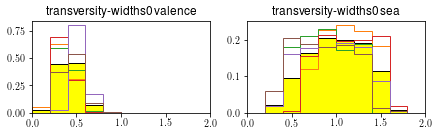

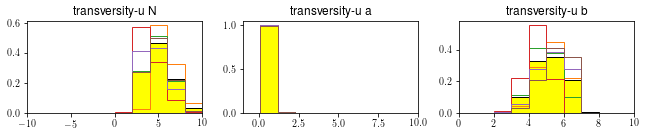

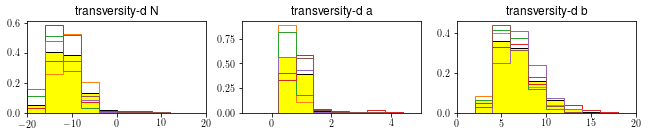

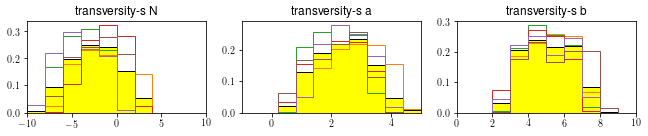

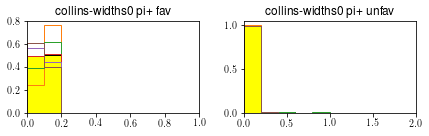

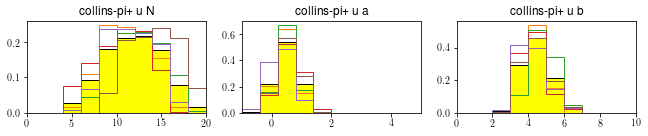

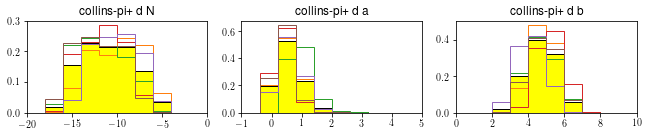

In [88]:
plot_params('transversity',['widths0 valence','widths0 sea'],0)
plot_params('transversity',['u N','u a','u b'],1)
plot_params('transversity',['d N','d a','d b'],2)
plot_params('transversity',['s N','s a','s b'],3)
plot_params('collins',['widths0 pi+ fav','widths0 pi+ unfav'],4)
plot_params('collins',['pi+ u N','pi+ u a','pi+ u b'],5)
plot_params('collins',['pi+ d N','pi+ d a','pi+ d b'],6)
# plot_params('collins',['widths0 k+ fav','widths0 k+ unfav'])
# plot_params('collins',['k+ u N','k+ u a','k+ u b'])
# plot_params('collins',['k+ d N','k+ d a','k+ d b'])
# plot_params('collins',['k+ sb N','k+ sb a','k+ sb b'])

## 2D parameters hist 

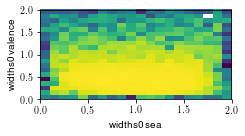

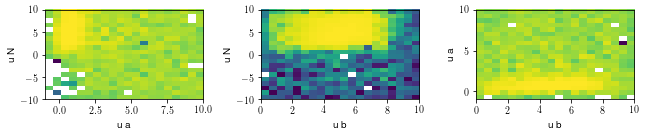

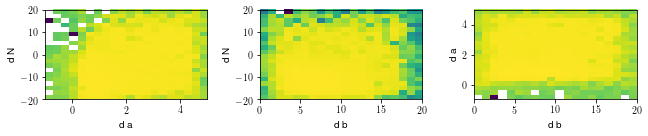

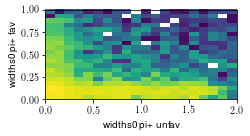

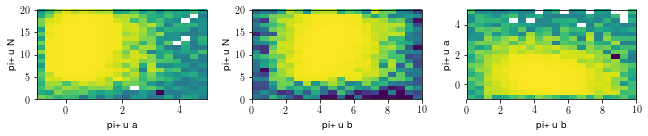

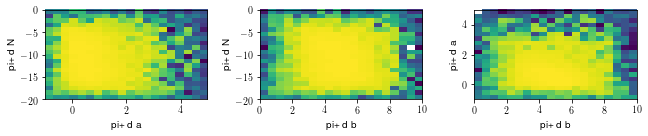

In [80]:
def plot_corr(k,kk):
    order=parman.order
    get_idx=lambda _kk: [i for i in range(len(order)) if order[i][1]==k if order[i][2]==_kk][0]
    nrows,ncols=1,5
    py.figure(figsize=(ncols*3,nrows*2))
    pars=np.transpose(samples)#[get_idx(kk[i])]

    cnt=0
    for i in range(len(kk)):
        pmin1=conf['params'][k][kk[i]]['min']
        pmax1=conf['params'][k][kk[i]]['max']
        par1=pars[get_idx(kk[i])]
        for j in range(len(kk)):
            if i<=j: continue
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt)
            pmin2=conf['params'][k][kk[j]]['min']
            pmax2=conf['params'][k][kk[j]]['max']
            par2=pars[get_idx(kk[j])]
            plims=[[pmin1,pmax1],[pmin2,pmax2]]
            ax.hist2d(par1,par2,bins=20,weights=weights,norm=LogNorm())    
            ax.set_xlabel(kk[i])
            ax.set_ylabel(kk[j])
    py.tight_layout()

plot_corr('transversity',['widths0 valence','widths0 sea'])
plot_corr('transversity',['u N','u a','u b'])
plot_corr('transversity',['d N','d a','d b'])
plot_corr('collins',['widths0 pi+ fav','widths0 pi+ unfav'])
plot_corr('collins',['pi+ u N','pi+ u a','pi+ u b'])
plot_corr('collins',['pi+ d N','pi+ d a','pi+ d b'])
# plot_corr('collins',['widths0 k+ fav','widths0 k+ unfav'])
# plot_corr('collins',['k+ u N','k+ u a','k+ u b'])
# plot_corr('collins',['k+ d N','k+ d a','k+ d b'])
# plot_corr('collins',['k+ sb N','k+ sb a','k+ sb b'])

## Kinematics

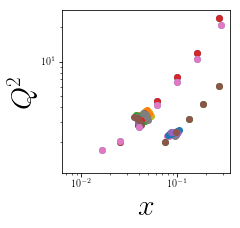

In [15]:
nrows,ncols=1,1
py.figure(figsize=(ncols*3,nrows*3))
ax=py.subplot(111)
for k in conf['datasets']['sidis']['xlsx']: 
    x=resman.sidisres.tabs[k]['x']
    Q2=resman.sidisres.tabs[k]['Q2']
    ax.scatter(x,Q2)
ax.set_ylabel(r'$Q^2$',size=30)
ax.set_xlabel(r'$x$',size=30)
ax.semilogx()
ax.semilogy();

## data vs theory

In [18]:
def get_RAW():
    RAW={}
    for k in conf['datasets']: 
        RAW[k]={}
        for kk in conf['datasets'][k]['xlsx']: 
            RAW[k][kk]=[]
    return RAW

THY=get_RAW()
RES=get_RAW()
bar=BAR('gen chi2 values',len(samples))
for ii in range(len(samples)):
    par=samples[ii]
    resman.get_residuals(par)
    for k in RES:
        if k=='sidis': 
            for kk in RES[k]: 
                THY[k][kk].append(np.copy(resman.sidisres.tabs[kk]['thy']))
                RES[k][kk].append(np.copy(resman.sidisres.tabs[kk]['residuals']))
        if k=='moments': 
            for kk in RES[k]:
                THY[k][kk].append(np.copy(resman.momres.tabs[kk]['thy']))
                RES[k][kk].append(np.copy(resman.momres.tabs[kk]['residuals']))
    bar.next()
bar.finish()
RAW={'THY':THY,'RES':RES}
save(RAW,'%s/raw%d'%(path,best))

gen chi2 values [100%]


In [19]:
RAW=load('%s/raw%d'%(path,best))
RES=RAW['RES']
THY=RAW['THY']

for k in RES:
    for kk in RES[k]: 
        if k=='sidis': 
            thy =np.einsum('k,ki',weights,np.array(THY[k][kk]))
            dthy=np.einsum('k,ki',weights,(np.array(THY[k][kk])-thy)**2)**0.5
            residuals=np.einsum('k,ki',weights,RES[k][kk])
            resman.sidisres.tabs[kk]['thy']=thy
            resman.sidisres.tabs[kk]['dthy']=dthy
            tab=resman.sidisres.tabs[kk]
            resman.sidisres.tabs[kk]['chi2']=residuals**2
            resman.sidisres.tabs[kk]=pd.DataFrame(resman.sidisres.tabs[kk])

In [20]:
NPTS=0
CHI2=0
D={}
for k in ['had','tar','dep','col','chi2','npts','chi2/npt']: D[k]=[]
for k in RES:
    for kk in RES[k]:
        if k=='sidis':
            npts=resman.sidisres.tabs[kk]['value'].size
            chi2=np.sum(resman.sidisres.tabs[kk]['chi2'])
            D['tar'].append(resman.sidisres.tabs[kk]['target'].values[0])
            D['dep'].append(resman.sidisres.tabs[kk]['dependence'].values[0])
            D['col'].append(resman.sidisres.tabs[kk]['col'].values[0].upper().strip())
            D['had'].append(resman.sidisres.tabs[kk]['hadron'].values[0])
            D['npts'].append(npts)
            D['chi2'].append(chi2)
            D['chi2/npt'].append(chi2/npts)
D=pd.DataFrame(D)
D = D[['col', 'tar', 'had', 'dep', 'npts','chi2','chi2/npt']]
D=D.sort_values(by=['col','tar'])
print D.to_string(index=False)
print '\nNtot =',np.sum(D.npts)
print 'Chi2tot =',np.sum(D.chi2)

col       tar  had dep  npts      chi2  chi2/npt
COMPASS  deuteron  pi+   x     6  4.426539  0.737757
COMPASS  deuteron  pi+  pT     6  3.152935  0.525489
COMPASS  deuteron  pi+   z     6  3.093186  0.515531
COMPASS  deuteron  pi-   x     6  3.375100  0.562517
COMPASS  deuteron  pi-  pT     6  7.656976  1.276163
COMPASS  deuteron  pi-   z     6  6.246465  1.041077
COMPASS    proton  pi+   z     6  1.623095  0.270516
COMPASS    proton  pi+   x     7  5.551774  0.793111
COMPASS    proton  pi+  pt     6  2.445861  0.407643
COMPASS    proton  pi-  pt     6  0.824096  0.137349
COMPASS    proton  pi-   x     7  3.988317  0.569760
COMPASS    proton  pi-   z     6  7.746684  1.291114
 HERMES    proton  pi-  pt     5  2.254144  0.450829
 HERMES    proton  pi-   z     6  2.710164  0.451694
 HERMES    proton  pi+  pt     5  2.052905  0.410581
 HERMES    proton  pi+   x     5  4.929302  0.985860
 HERMES    proton  pi+   z     6  3.620429  0.603405
 HERMES    proton  pi-   x     5  8.631313  1.7262

## AUT plot

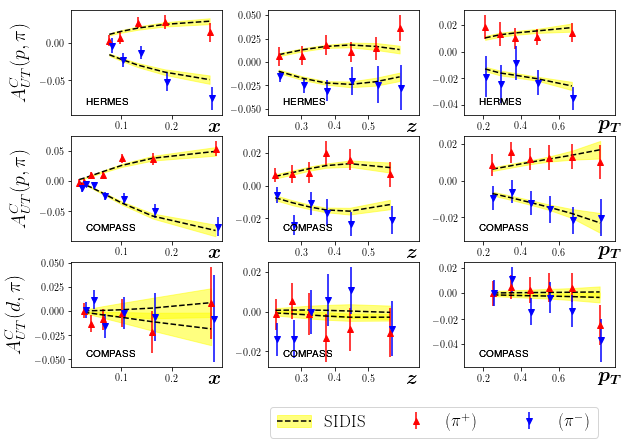

In [21]:
def get_key(K,tar,had,col,tabs,dep):
    kk=None
    for k in K:
        d=tabs[k]
        #print '-->',d['target'].values[0],d['hadron'].values[0],d['col'].values[0].upper()
        if tar==d['target'].values[0] \
            and had==d['hadron'].values[0] \
            and dep==d['dependence'].values[0] \
            and col==d['col'].values[0].upper().strip(): kk=k
    return kk

tabs=resman.sidisres.tabs
def plot(idx,dep,tar,had,col,legend=False):
    #print tar,had,col
    k=get_key(tabs.keys(),tar,had,col,tabs,dep)
    d1=resman.sidisres.tabs[k]
    ax=py.subplot(nrows,ncols,idx)
    dep=d1['dependence'].values[0]
    #obs=d['obs'].values[0]
    tar=d1['target'].values[0]
    had=d1['hadron'].values[0]
    if dep=='pt': dep='pT'
    sign=1
    if col=='COMPASS': sign=-1
    shift=0
    if '-' in had:shift=0.005
    if '-' in had: e=ax.errorbar(d1[dep]+shift,sign*d1['value'],d1['alpha'],fmt='bv')
    if '+' in had: e=ax.errorbar(d1[dep]+shift,sign*d1['value'],d1['alpha'],fmt='r^')
    b1=ax.fill_between(d1[dep],sign*(d1['thy']-d1['dthy']),sign*(d1['thy']+d1['dthy']),color='Yellow',alpha=0.5)
    l1,=ax.plot(d1[dep],sign*d1['thy'],'k--')
    if dep=='x': ax.set_xlabel(r'$\boldsymbol{x}$',size=20)
    if dep=='z': ax.set_xlabel(r'$\boldsymbol{z}$',size=20)
    if dep=='pT': ax.set_xlabel(r'$\boldsymbol{p_T}$',size=20)
    ax.xaxis.set_label_coords(0.95, -0.02)
    if dep=='x':
        ax.set_xlim(0,0.3)
        ax.set_xticks([0.1,0.2])
    if dep=='z':
        ax.set_xlim(0.2,0.65)
        ax.set_xticks([0.3,0.4,0.5])
    if dep=='pT':
        ax.set_xlim(0.1,0.9)
        ax.set_xticks([0.2,0.4,0.6])

    #if dep=='pT':ax.set_xlim(0.2,0.65)
    #ax.tick_params(axis='both', which='major', labelsize=16)
    #ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.set_ylabel(obs)
    #ax.set_title('%s %s %s'%(tar,had.replace('+','').replace('-',''),col))
    #ax.set_xlim(0,0.3)
    #ax.set_ylim(-.1,.1)
    #ax.set_xticklabels([])
    ax.text(0.1,0.1,col,transform=ax.transAxes,size=10)
    if legend: return ax,(b1,l1),e
    else: return ax


nrows,ncols=6,3
py.figure(figsize=(ncols*3,nrows*2))

ax=plot(1,'x','proton','pi+','HERMES')
ax=plot(1,'x','proton','pi-','HERMES')
ax.set_ylabel(r'$A_{UT}^{C}(p,\pi)$',size=20)
ax=plot(2,'z','proton','pi+','HERMES')
ax=plot(2,'z','proton','pi-','HERMES')
ax=plot(3,'pt','proton','pi+','HERMES')
ax=plot(3,'pt','proton','pi-','HERMES')

ax=plot(4,'x','proton','pi+','COMPASS')
ax=plot(4,'x','proton','pi-','COMPASS')
ax.set_ylabel(r'$A_{UT}^{C}(p,\pi)$',size=20)
ax=plot(5,'z','proton','pi+','COMPASS')
ax=plot(5,'z','proton','pi-','COMPASS')
ax=plot(6,'pt','proton','pi+','COMPASS')
ax=plot(6,'pt','proton','pi-','COMPASS')

ax=plot(7,'x','deuteron','pi+','COMPASS')
ax=plot(7,'x','deuteron','pi-','COMPASS')
ax.set_ylabel(r'$A_{UT}^{C}(d,\pi)$',size=20)
ax=plot(8,'z','deuteron','pi+','COMPASS')
ax=plot(8,'z','deuteron','pi-','COMPASS')
ax,b1,ep=plot(9,'pT','deuteron','pi+','COMPASS',legend=True)
ax,b1,em=plot(9,'pT','deuteron','pi-','COMPASS',legend=True)

# ax=plot(10,'x','proton','k+','HERMES')
# ax=plot(10,'x','proton','k-','HERMES')
# ax.set_ylabel(r'$A_{UT}^{C}(p,K)$',size=20)
# ax=plot(11,'z','proton','k+','HERMES')
# ax=plot(11,'z','proton','k-','HERMES')
# ax=plot(12,'pt','proton','k+','HERMES')
# ax=plot(12,'pt','proton','k-','HERMES')

# ax=plot(13,'x','proton','k+','COMPASS')
# ax=plot(13,'x','proton','k-','COMPASS')
# ax.set_ylabel(r'$A_{UT}^{C}(p,K)$',size=20)
# ax=plot(14,'z','proton','k+','COMPASS')
# ax=plot(14,'z','proton','k-','COMPASS')
# ax=plot(15,'pt','proton','k+','COMPASS')
# ax=plot(15,'pt','proton','k-','COMPASS')


# ax=plot(16,'x','deuteron','k+','COMPASS')
# ax=plot(16,'x','deuteron','k-','COMPASS')
# ax.set_ylabel(r'$A_{UT}^{C}(d,K)$',size=20)
# ax,b1,ep=plot(17,'z','deuteron','k+','COMPASS',legend=True)
# ax,b1,em=plot(17,'z','deuteron','k-','COMPASS',legend=True)
# ax=plot(18,'pT','deuteron','k+','COMPASS')
# ax=plot(18,'pT','deuteron','k-','COMPASS')
ax.legend([b1,ep,em],[r'$\rm SIDIS$',r'$(\pi^+)$',r'$(\pi^-)$']\
           ,loc='upper center', bbox_to_anchor=(-0.2, -0.3)\
           ,fancybox=True, shadow=False, ncol=4,fontsize=17)

py.subplots_adjust(wspace=0.3, hspace=0.2,left=0.11, bottom=0.1, right=0.95, top=0.95)
py.savefig('gallery/transversity/dvt.pdf')

## PDFs and FFs

In [43]:
def calc(func,msg):
    RAW=[]
    bar=BAR(msg,len(samples))
    for i in range(len(samples)):
        par=samples[i]
        parman.set_new_params(par)
        RAW.append(func())
        bar.next()
    bar.finish()
    RAW=np.array(RAW)
    f =np.einsum('k,kif->if',weights,RAW)
    df=np.einsum('k,kif->if',weights,(RAW-f)**2)**0.5
    f=np.einsum('if->fi',f)
    df=np.einsum('if->fi',df)
    return {'f':f,'df':df}

In [44]:
X1=10**np.linspace(-3,-1)
X2=np.linspace(0.101,0.999)
X=np.append(X1,X2)
h1=calc(lambda : [resman.conf['transversity'].get_C(x,1) for x in X],'calc h')

calc h [100%]


In [45]:
Z1=10**np.linspace(-3,-1)
Z2=np.linspace(0.101,0.999)
Z=np.append(Z1,Z2)
Hpi1=calc(lambda : [resman.conf['collins'].get_C(z,1,'pi+') for z in Z],'calc H(pi+)')

calc H(pi+) [100%]


In [46]:
Z1=10**np.linspace(-3,-1)
Z2=np.linspace(0.101,0.999)
Z=np.append(Z1,Z2)
Hk1=calc(lambda : [resman.conf['collins'].get_C(z,1,'k+') for z in Z],'calc H(k+)')

calc H(k+) [100%]


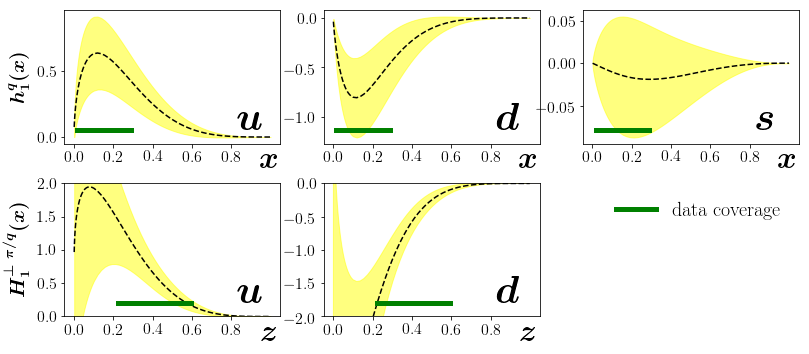

In [47]:
def get_kinematics():
    tabs=resman.sidisres.tabs
    X,Z,Q2,pT=[],[],[],[]
    for k in tabs:X=np.append(tabs[k]['x'],X)
    for k in tabs:Z=np.append(tabs[k]['z'],Z)
    for k in tabs:Q2=np.append(tabs[k]['Q2'],Q2)
    for k in tabs:pT=np.append(tabs[k]['pT'],pT)
    return {'X':X,'Z':Z,'Q2':Q2,'pT':pT}
kin=get_kinematics()

nrows,ncols=2,3
py.figure(figsize=(ncols*4,nrows*2.5))

def plot(idx,flav,legend=False,ylims=None):
    ax=py.subplot(nrows,ncols,idx)
    band1=ax.fill_between(X,(h1['f'][flav]-h1['df'][flav]),(h1['f'][flav]+h1['df'][flav]),color='Yellow',alpha=0.5)
    line1,=ax.plot(X,h1['f'][flav],'k--')
    #band2=ax.fill_between(X,(h2['f'][flav]-h2['df'][flav]),(h2['f'][flav]+h2['df'][flav]),color='r',alpha=0.5)
    #line2,=ax.plot(X,h2['f'][flav],'r-')
    if ylims!=None: ax.set_ylim(ylims[0],ylims[1])
    ax.set_xlabel(r'$\boldsymbol{x}$',size=30)
    ax.xaxis.set_label_coords(0.95, -0.02)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks([0,.2,.4,.6,.8])
    xmin=np.amin(kin['X'])
    xmax=np.amax(kin['X'])
    ymin, ymax = ax.get_ylim()
    dy=0.1*(ymax-ymin)
    ax.plot([xmin,xmax],[ymin+dy,ymin+dy],'g-',lw=5)
    return ax
 
def plotpi(idx,flav,ylims=None):
    ax=py.subplot(nrows,ncols,idx)
    band1=ax.fill_between(Z,(Hpi1['f'][flav]-Hpi1['df'][flav]),(Hpi1['f'][flav]+Hpi1['df'][flav]),color='Yellow',alpha=0.5)
    line1,=ax.plot(Z,Hpi1['f'][flav],'k--')
    #band2=ax.fill_between(Z,(Hpi2['f'][flav]-Hpi2['df'][flav]),(Hpi2['f'][flav]+Hpi2['df'][flav]),color='r',alpha=0.5)
    #line2,=ax.plot(Z,Hpi2['f'][flav],'r-')
    if ylims!=None: ax.set_ylim(ylims[0],ylims[1])
    ax.set_xlabel(r'$\boldsymbol{z}$',size=30)
    ax.xaxis.set_label_coords(0.95, -0.02)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks([0,.2,.4,.6,.8])
    zmin=np.amin(kin['Z'])
    zmax=np.amax(kin['Z'])
    ymin, ymax = ax.get_ylim()
    dy=0.1*(ymax-ymin)
    line,=ax.plot([zmin,zmax],[ymin+dy,ymin+dy],'g-',lw=5)
    return ax,(band1,line1),line

def plotk(idx,flav,ylims=None):
    ax=py.subplot(nrows,ncols,idx)
    band1=ax.fill_between(Z,(Hk1['f'][flav]-Hk1['df'][flav]),(Hk1['f'][flav]+Hk1['df'][flav]),color='Yellow',alpha=0.5)
    line1,=ax.plot(Z,Hk1['f'][flav],'k--')
    #band2=ax.fill_between(Z,(Hk2['f'][flav]-Hk2['df'][flav]),(Hk2['f'][flav]+Hk2['df'][flav]),color='r',alpha=0.5)
    #line2,=ax.plot(Z,Hk2['f'][flav],'r-')
    if ylims!=None: ax.set_ylim(ylims[0],ylims[1])
    ax.set_xlabel(r'$\boldsymbol{z}$',size=30)
    ax.xaxis.set_label_coords(0.95, -0.02)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks([0,.2,.4,.6,.8])
    zmin=np.amin(kin['Z'])
    zmax=np.amax(kin['Z'])
    ymin, ymax = ax.get_ylim()
    dy=0.1*(ymax-ymin)
    line,=ax.plot([zmin,zmax],[ymin+dy,ymin+dy],'g-',lw=5)
    return ax

ax=plot(1,1)
ax.set_ylabel(r'$\boldsymbol{h_1^q(x)}$',size=20)
ax.text(0.8,0.1,r'$\boldsymbol{u}$',size=40,transform=ax.transAxes)

ax=plot(2,3)
ax.text(0.8,0.1,r'$\boldsymbol{d}$',size=40,transform=ax.transAxes)

ax=plot(3,5)
ax.text(0.8,0.1,r'$\boldsymbol{s}$',size=40,transform=ax.transAxes)

ax,b1,l=plotpi(4,1,[0,2])
ax.set_ylabel(r'$\boldsymbol{H_1^{\perp~\pi/q}(x)}$',size=20)
ax.text(0.8,0.1,r'$\boldsymbol{u}$',size=40,transform=ax.transAxes)

ax,b1,l=plotpi(5,3,[-2,.0])
ax.legend([l],[r'$\rm data~coverage$']\
    ,fontsize=20,frameon=False,loc=1,bbox_to_anchor=(2.2, 1))
ax.text(0.8,0.1,r'$\boldsymbol{d}$',size=40,transform=ax.transAxes)

# ax=plotk(7,1,[-0.01,0.5])
# ax.set_ylabel(r'$\boldsymbol{H_1^{\perp~K/q}(x)}$',size=20)
# ax.text(0.8,0.7,r'$\boldsymbol{u}$',size=40,transform=ax.transAxes)

# ax=plotk(8,3,[-0.1,0.1])
# ax.text(0.4,0.7,r'$\boldsymbol{d}$',size=40,transform=ax.transAxes)

# ax=plotk(9,6,[-1,1])
# ax.text(0.8,0.7,r'$\boldsymbol{\bar{s}}$',size=40,transform=ax.transAxes)

py.subplots_adjust(wspace=0.2, hspace=0.3,left=0.1, bottom=0.1, right=0.95, top=0.95)
#py.tight_layout()
py.savefig('gallery/transversity/h-H.pdf')
